analyze by age, gender, smoking, alcohol, active level

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [56]:
from datetime import datetime as dt

start = dt.now()

In [57]:
df_raw = pd.read_csv("cardio_train_data.csv")

df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [58]:
# clean up data

df = df_raw.drop(["id"], axis=1)
df = df.drop(df.loc[:, "height":"gluc"], axis=1)

df.head()

,age,gender,smoke,alco,active,cardio
0,18393,2,0,0,1,0
1,20228,1,0,0,1,1
2,18857,1,0,0,0,1
3,17623,2,0,0,1,1
4,17474,1,0,0,0,0


In [59]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [60]:
# count age by year

df["age"] = round(df["age"] / 365)
df["age"].describe()

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

In [61]:
# recategorise age

# 2015 WHO's age classification
# 25 - 44 : Young : 0
# 45 - 59 : Middle : 1
# 60 - 74 : Elderly : 2
# 75 - 89 : Senile : 3
# 90++ : Long-livers : 4

# data set => min age: 30, max age: 65

df.loc[(df["age"] >= 25) & (df["age"] < 45), "age"] = 0
df.loc[(df["age"] >= 45) & (df["age"] < 60), "age"] = 1
df.loc[(df["age"] >= 60) & (df["age"] < 75), "age"] = 2
df.loc[(df["age"] >= 75) & (df["age"] < 90), "age"] = 3
df.loc[(df["age"] >= 90), "age"] = 4

df.tail()

,age,gender,smoke,alco,active,cardio
69995,1.0,2,1,0,1,0
69996,2.0,1,0,0,1,1
69997,1.0,2,0,1,0,1
69998,2.0,1,0,0,0,1
69999,1.0,1,0,0,1,0


In [62]:
x = df.iloc[:, 0:5]
x.head()

,age,gender,smoke,alco,active
0,1.0,2,0,0,1
1,1.0,1,0,0,1
2,1.0,1,0,0,0
3,1.0,2,0,0,1
4,1.0,1,0,0,0


In [63]:
y = df["cardio"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [65]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(random_state = 42)

In [66]:
decTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred = decTree.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

accScore = accuracy_score(y_test, y_pred)
print("Accuracy score:",accScore)

Accuracy score: 0.5804571428571429


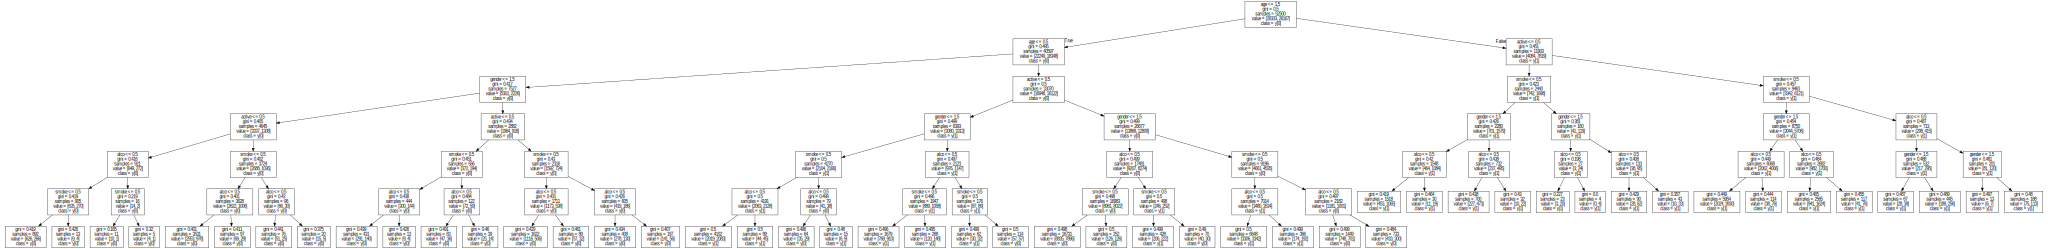

In [69]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(decTree, out_file=None, class_names=True,feature_names=x_train.columns))

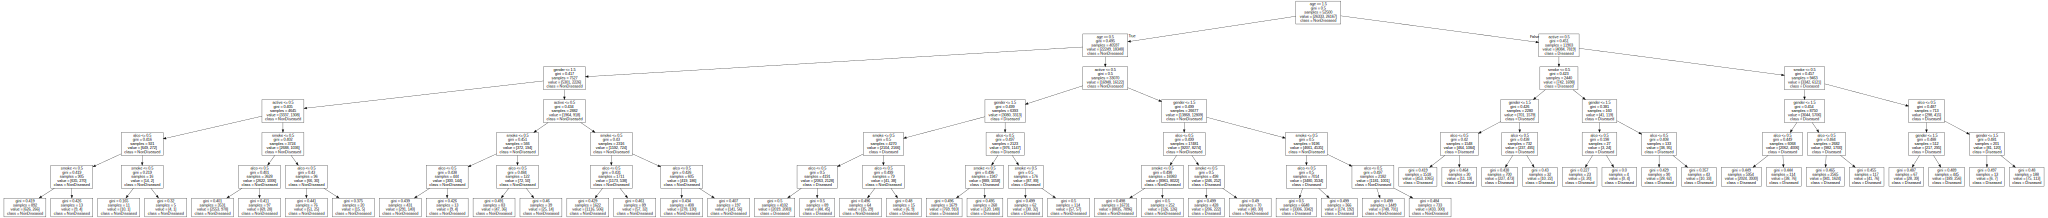

In [70]:
Source(tree.export_graphviz(decTree, out_file=None, class_names=["NonDiseased", "Diseased"],feature_names=x_train.columns))

In [71]:
# set depth to 3

decTree2 = DecisionTreeClassifier(max_depth=3, random_state=42)
decTree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

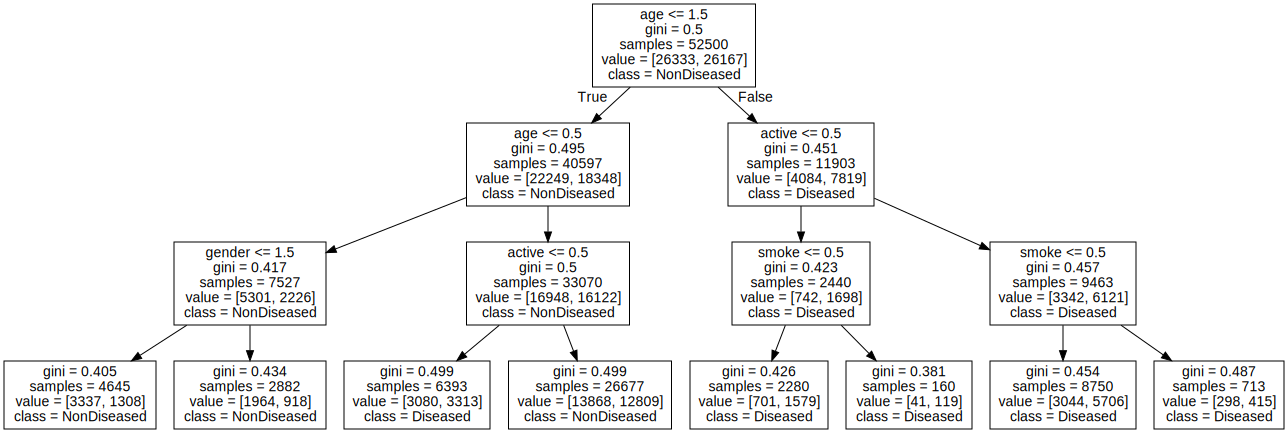

In [72]:
Source(tree.export_graphviz(decTree2, out_file=None, class_names=["NonDiseased", "Diseased"],feature_names=x_train.columns))

In [73]:
y_pred2 = decTree2.predict(x_test)
accuracy_score(y_test, y_pred2)

0.5841714285714286

In [74]:
# set depth to 1

decTree3 = DecisionTreeClassifier(max_depth=1, random_state=42)
decTree3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

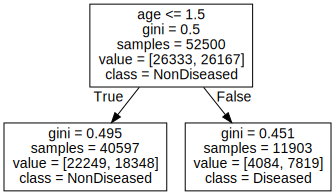

In [75]:
Source(tree.export_graphviz(decTree3, out_file=None, class_names=["NonDiseased", "Diseased"],feature_names=x_train.columns))

In [76]:
y_pred3 = decTree3.predict(x_test)
accuracy_score(y_test, y_pred3)

0.5738857142857143

In [77]:
running_secs = (dt.now() - start).seconds

print("Duration of training and prediction:", running_secs, "seconds")

Duration of training and prediction: 1 seconds
